## What is the statistical summary of the data?

> **Note:** The data in this notebook is most likely out of date, run it again to get latest data


### 1. Connect to HopsWorks

In [1]:
import hopsworks, os
project = hopsworks.login(api_key_value=os.getenv("API_KEY"))
fs = project.get_feature_store()
fg = fs.get_or_create_feature_group("aqi_feature_pipeline", version=1)
df = fg.read()

2025-11-09 17:40:29,896 INFO: Initializing external client
2025-11-09 17:40:29,897 INFO: Base URL: https://c.app.hopsworks.ai:443




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


2025-11-09 17:40:32,465 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1248425
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.46s) 


### 2. Find statistical summary

In [2]:
df.describe()

,temp,wind_speed,wind_gusts,humidity_percent,dew_point,pressure,cloud_cover,visibility,pm_10,pm_2_5,no_2,o_3,so_2,co,aqi
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,28.350877,11.369518,11.389254,45.478070,13.675439,1009.719298,29.008772,4.594298,19.346491,35.237939,19.864035,26.503289,15.268640,259.152412,54.764254
std,4.756614,7.511899,7.524042,23.779207,7.107604,3.488438,29.598594,1.344130,21.513596,16.540320,16.565843,15.996089,67.937396,124.827986,26.904031
min,15.000000,0.000000,0.000000,6.000000,0.000000,998.000000,0.000000,1.000000,3.000000,4.000000,4.000000,4.000000,2.000000,16.000000,12.000000
25%,25.000000,7.000000,7.000000,25.000000,8.000000,1008.000000,0.000000,5.000000,10.000000,23.000000,10.000000,10.000000,6.000000,172.000000,35.000000
50%,28.000000,9.000000,9.000000,43.000000,12.000000,1010.000000,35.000000,5.000000,15.000000,33.000000,13.000000,26.000000,7.000000,233.000000,50.000000
75%,32.000000,15.000000,15.000000,65.000000,21.000000,1012.000000,51.000000,5.000000,21.000000,47.000000,20.000000,37.000000,9.000000,308.000000,69.000000
max,38.000000,74.000000,74.000000,94.000000,26.000000,1018.000000,100.000000,8.000000,217.000000,82.000000,84.000000,69.000000,822.000000,818.000000,186.000000


#### Variance

In [4]:
df.var(numeric_only=True)

temp                   22.625378
wind_speed             56.428620
wind_gusts             56.611213
humidity_percent      565.450671
dew_point              50.518035
pressure               12.169199
cloud_cover           876.076762
visibility              1.806685
pm_10                 462.834807
pm_2_5                273.582181
no_2                  274.427157
o_3                   255.874852
so_2                 4615.489773
co                  15582.026141
aqi                   723.826910
dtype: float64

#### Standard Deviation

In [19]:
df.std(numeric_only=True)

temp                  4.756614
wind_speed            7.511899
wind_gusts            7.524042
humidity_percent     23.779207
dew_point             7.107604
pressure              3.488438
cloud_cover          29.598594
visibility            1.344130
pm_10                21.513596
pm_2_5               16.540320
no_2                 16.565843
o_3                  15.996089
so_2                 67.937396
co                  124.827986
aqi                  26.904031
dtype: float64

#### Length of dataset

In [7]:
from datetime import datetime
f"As of today ({datetime.now()}), there are currently " + str(len(df)) + " hours of data in the feature store."

'As of today (2025-11-09 17:42:45.167805), there are currently 912 hours of data in the feature store.'

#### Boxplot

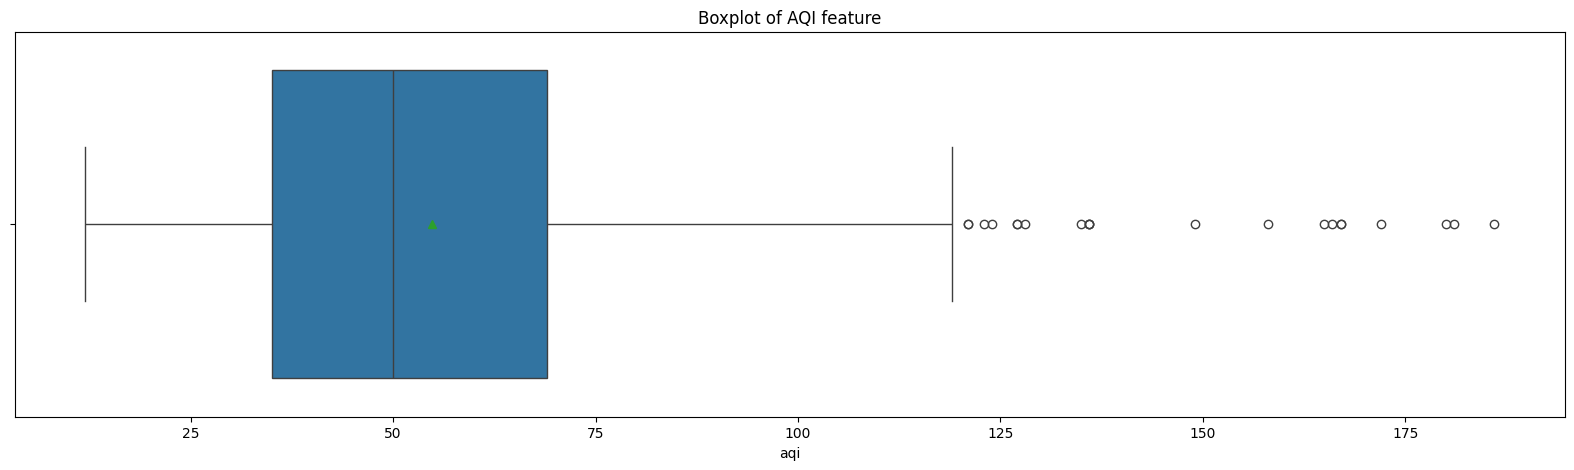

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.boxplot(x=df["aqi"], showmeans=True)
plt.title('Boxplot of AQI feature')
plt.show()